# Libraries

In [1]:
from src import data # dataset functions
import pandas as pd # dataframes
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra

import seaborn as sns
import seaborn.objects as so

In [2]:
# plot settings
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Datasets

In [3]:
data_directory = '../../../../data/04_pubmed'
datasets = data.dict_from_directory(data_directory)

# Dataframe Inspection

Save one DataFrame to a variable to inspect its structure

In [4]:
# subject & data of the first dataset
subject, dataframe = next(iter(datasets.items()))
print(f'accessing the first dataset: {subject}')

accessing the first dataset: adhd


Print the first few lines

In [5]:
dataframe.head()

,include,title,abstract,doi,literature_id,openalex_id
0,False,The effectiveness of clonidine as an analgesic...,To compare the analgesic effects of preoperati...,https://doi.org/10.1007/bf03012457,10051933,https://openalex.org/W2082613933
1,False,A Controlled Trial of Sustained-Release Buprop...,Use of nicotine-replacement therapies and the ...,https://doi.org/10.1056/nejm199903043400903,10053177,https://openalex.org/W2312609348
2,False,Effects of methylphenidate on complex cognitiv...,Three experiments were conducted to explore th...,https://doi.org/10.1037/0021-843x.108.1.90,10066996,https://openalex.org/W2022904832
3,False,Spinal Clonidine Prolongs Labor Analgesia from...,We sought to determine whether spinal clonidin...,https://doi.org/10.1097/00000539-199903000-00020,10072008,https://openalex.org/W2021097359
4,False,Low-Dose Clozapine for the Treatment of Drug-I...,Drug-induced psychosis is a difficult problem ...,https://doi.org/10.1056/nejm199903113401003,10072410,https://openalex.org/W4239283954


Index, dtypes, columns, non-null values and memory usage 

In [6]:
# calculate the memory usage insted of estimating it
dataframe.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   include        851 non-null    boolean
 1   title          851 non-null    string 
 2   abstract       830 non-null    string 
 3   doi            780 non-null    string 
 4   literature_id  851 non-null    Int64  
 5   openalex_id    843 non-null    string 
dtypes: Int64(1), boolean(1), string(4)
memory usage: 2.0 MB


- Records contain the label (include), title and abstract and multiple identifiers
- The label is a boolean, the other columns are strings or numbers
- The dataframe takes 2 MB of memory

# Missing Values

- How many titles and abstracts are missing?
- How many more were missing before downloading data from PubMed?

In [7]:
data_directory_before = '../../../../data/03_openalex'
datasets_before = data.dict_from_directory(data_directory_before)

Calculate missing titles & abstracts before and after the data retrieval:

In [18]:
missing_percentages = lambda x: round(x.isna().mean() * 100, 2)

In [19]:
missings_before = pd.DataFrame({
    'dataset': subject,
    'title': missing_percentages(df['title']),
    'abstract': missing_percentages(df['abstract']),
    'preprocessing': 'before'
}for subject, df in datasets_before.items())

In [20]:
missings_after = pd.DataFrame({
    'dataset': subject,
    'title': missing_percentages(df['title']),
    'abstract': missing_percentages(df['abstract']),
    'preprocessing': 'after'
}for subject, df in datasets.items())

In [21]:
missings = pd.concat([missings_before, missings_after])

missings_long = pd.melt(missings, id_vars=['dataset', 'preprocessing'], value_vars=['title', 'abstract'],
                        var_name='type', value_name='missing')

missings_long.sort_values(by='preprocessing', ascending=True, inplace=True)

missings_long

,dataset,preprocessing,type,missing
11,pancreatic_surgery,after,title,0.02
21,calcium_channel_blockers,after,abstract,3.53
20,atypical_antipsychotics,after,abstract,2.59
19,animal_depression,after,abstract,12.84
18,adhd,after,abstract,2.47
22,oral_hypoglycemics,after,abstract,3.78
10,oral_hypoglycemics,after,title,0.00
9,calcium_channel_blockers,after,title,0.00
23,pancreatic_surgery,after,abstract,8.74
7,animal_depression,after,title,2.71


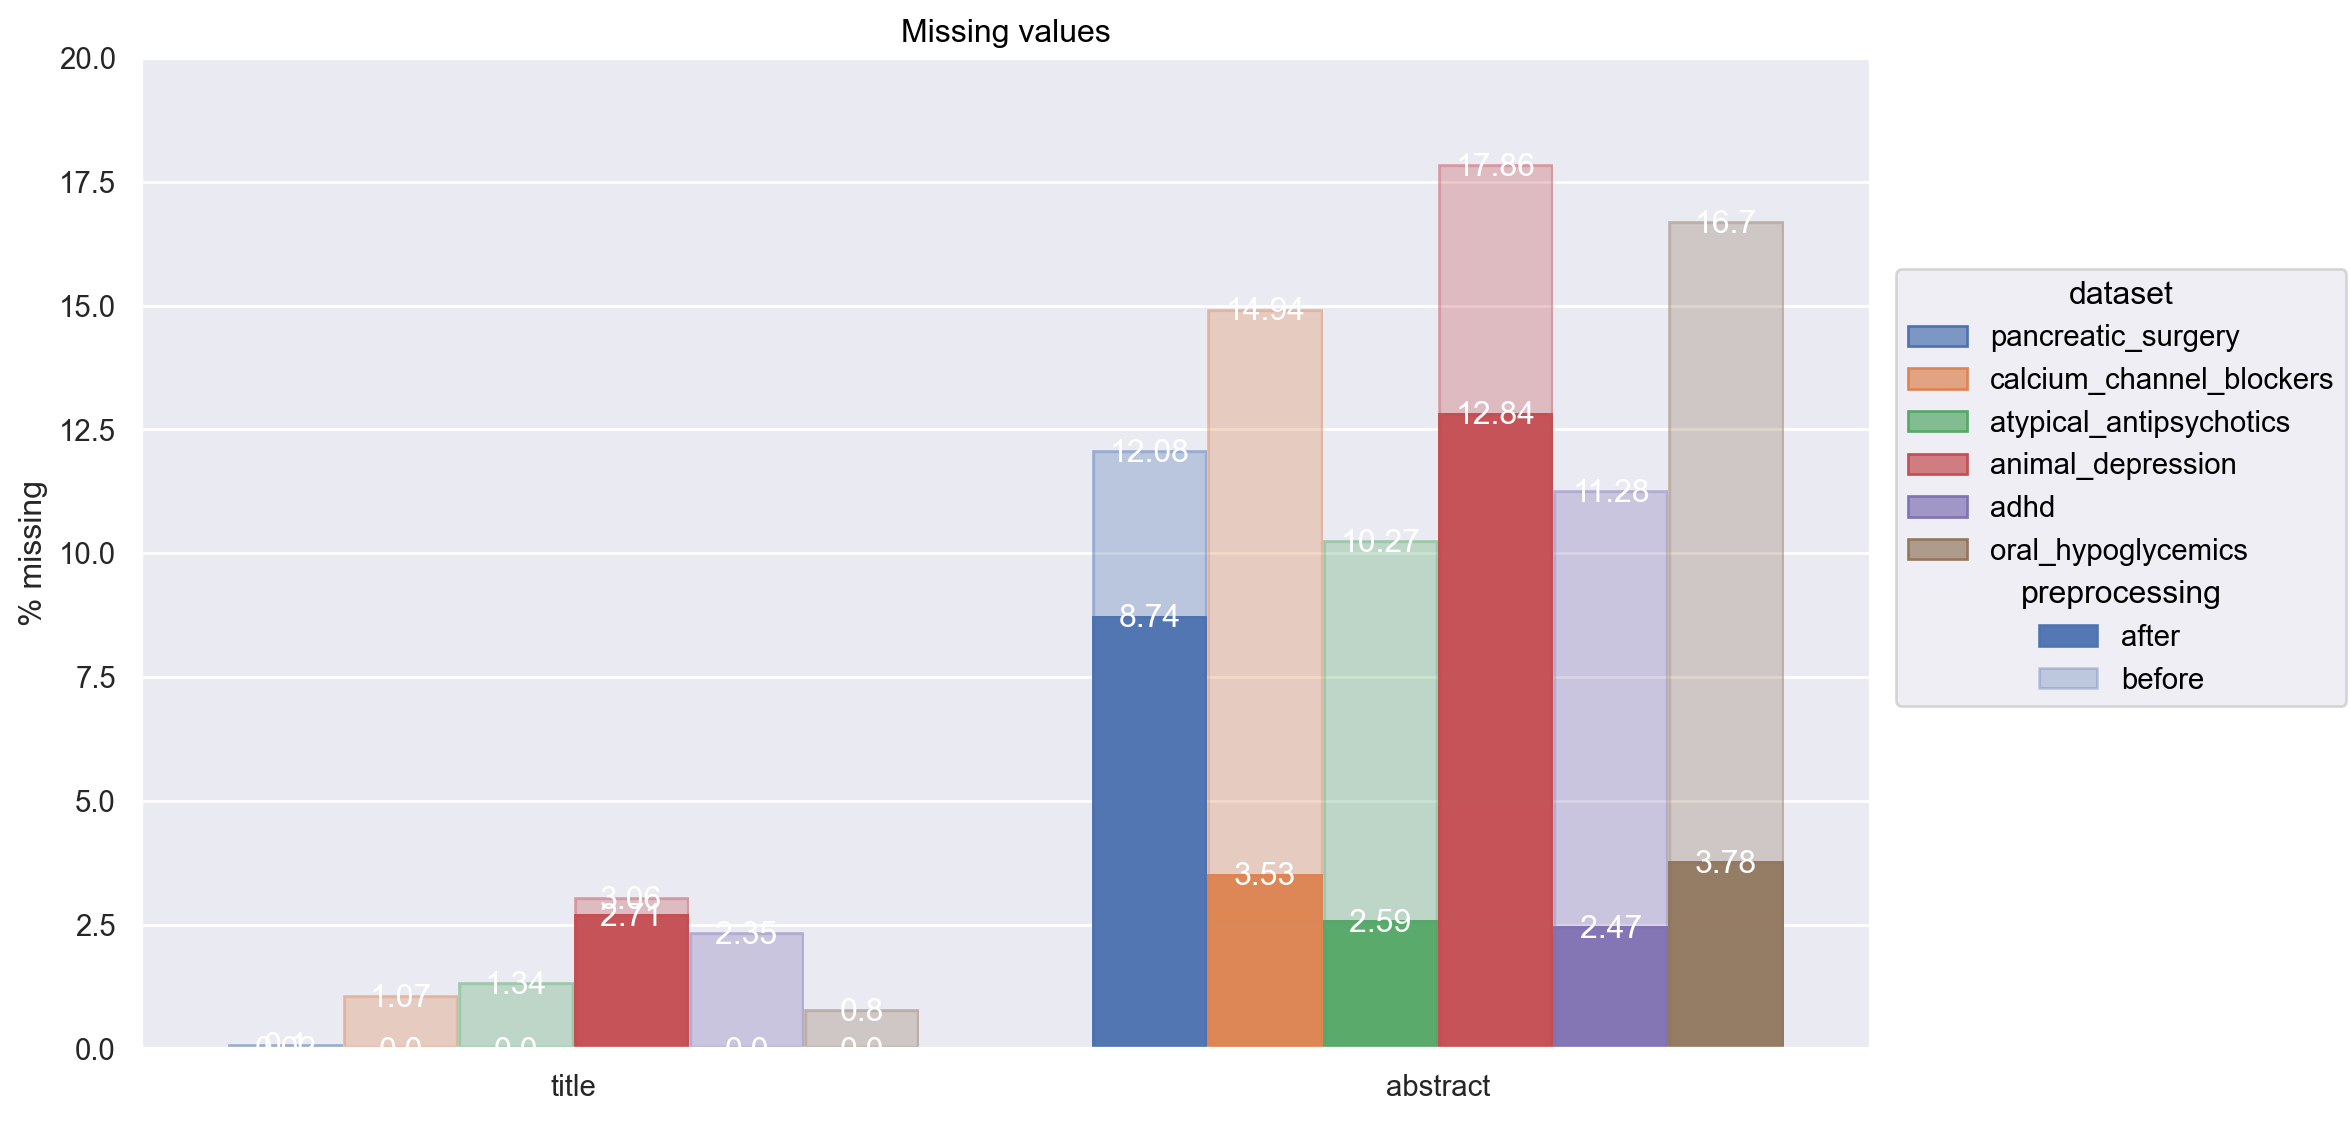

In [138]:
(
    so.Plot(data=missings_long, x='type', y='missing', color='dataset', alpha='preprocessing', edgealpha='preprocessing', text='missing')
    .add(so.Bar(), so.Dodge(by=['color']))
    .add(so.Text(color='w', alpha=1), so.Dodge(by=['color']))
    .label(x='', y='% missing', title='Missing values', legend='Test')
    .scale()
    .layout(size=(10, 6))
    .limit(y=(0,20))
)

# Label Distributions

In [14]:
a = datasets['pancreatic_surgery'].assign(dataset='pancreatic_surgery')

In [22]:
test = pd.DataFrame({
    'include': df.include,
    'dataset': subject
}for subject, df in datasets.items())

test = test.explode('include').reset_index(drop=True)


In [26]:
test = test.melt(id_vars=['dataset'], value_vars=['include'])

<Axes: xlabel='value', ylabel='percent'>

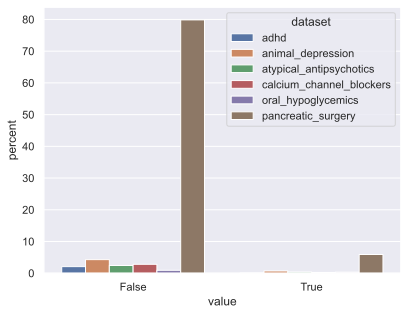

In [46]:
sns.set_theme()
sns.countplot(data=test, x='value', hue='dataset', stat='percent')

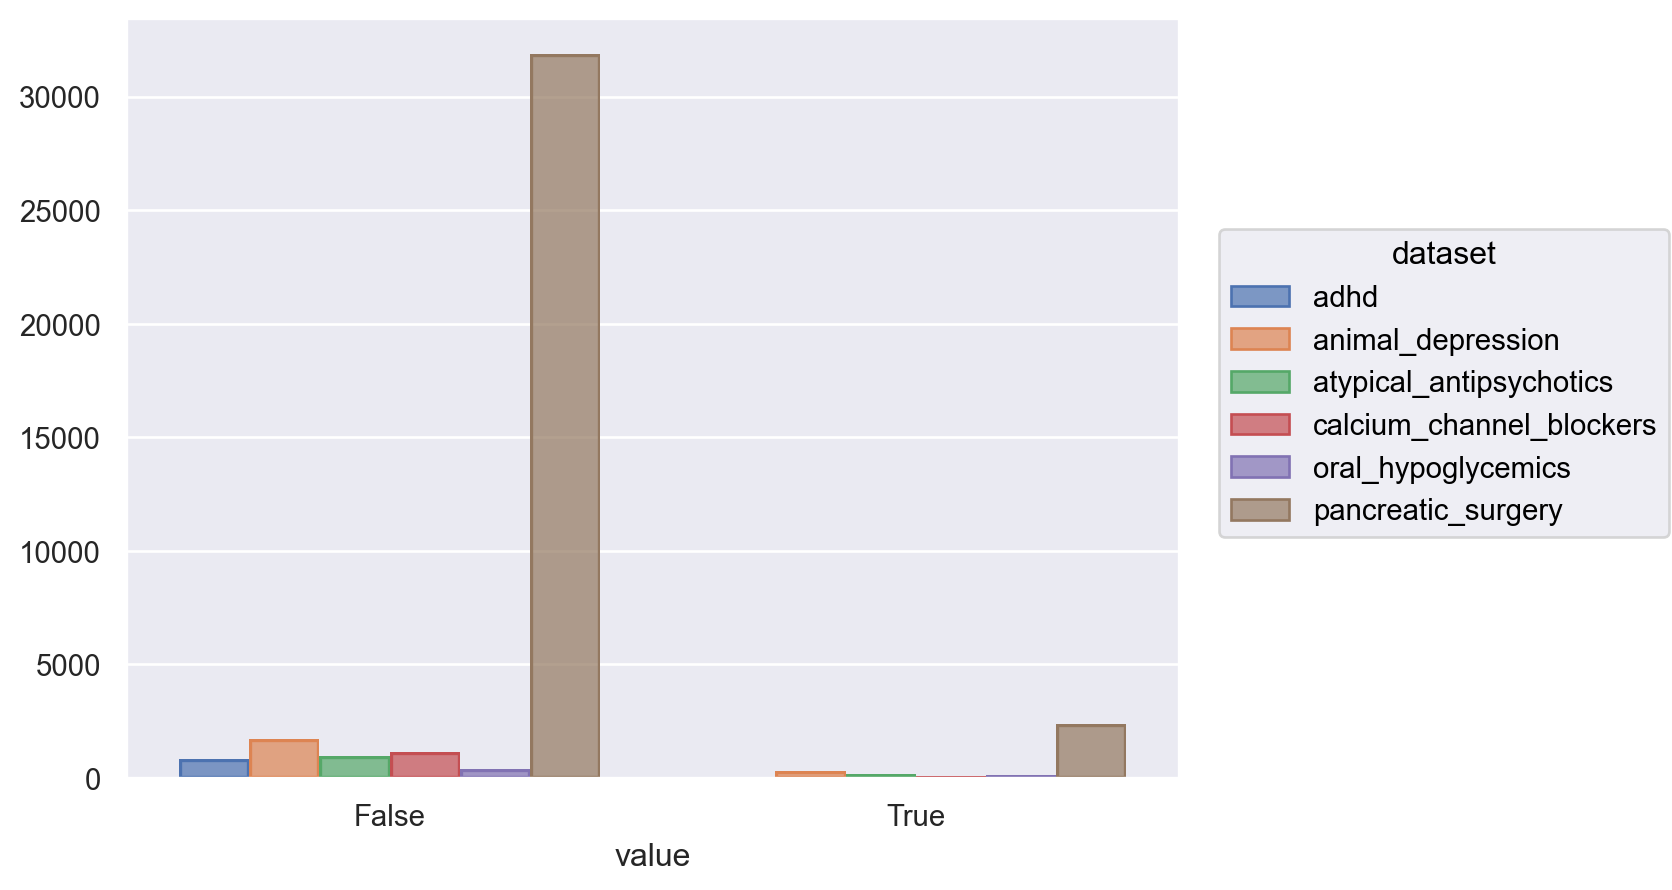

In [40]:
(
    so.Plot(data=test, x='value', color='dataset')
    .add(so.Bar(), so.Count(), so.Dodge())
)

In [ ]:
excludes = [datasets[key].value_counts(subset='include', normalize=True)[False] for key in datasets.keys()]
includes = [datasets[key].value_counts(subset='include', normalize=True)[True] for key in datasets.keys()]

In [ ]:
excludes

[0.9764982373678026,
 0.8595082789764175,
 0.8696428571428572,
 0.9178981937602627,
 0.7296222664015904,
 0.9312108986727474]

In [ ]:
includes

[0.023501762632197415,
 0.14049172102358254,
 0.13035714285714287,
 0.08210180623973727,
 0.27037773359840955,
 0.06878910132725252]

# Text Specific Analyses